In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
import seaborn as sns
from xlrd import open_workbook
from xlutils.copy import copy
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
sns.set()
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Classifier
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.cluster import MeanShift

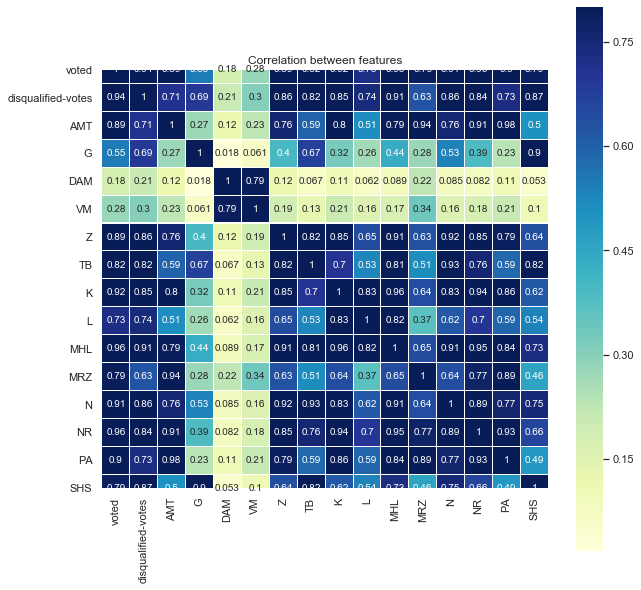

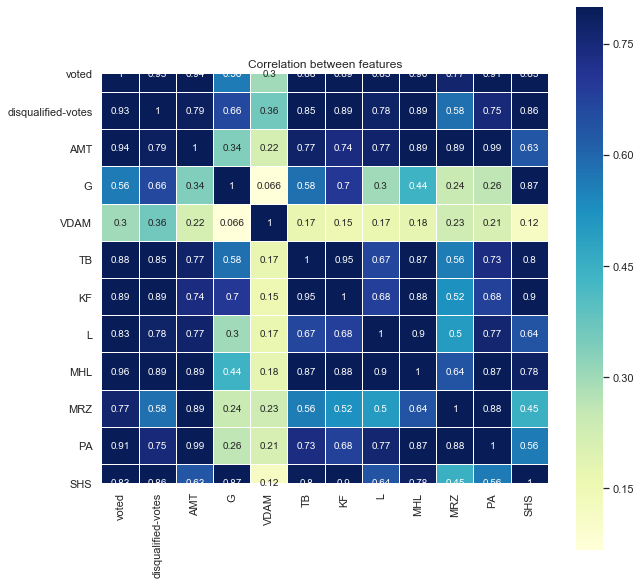

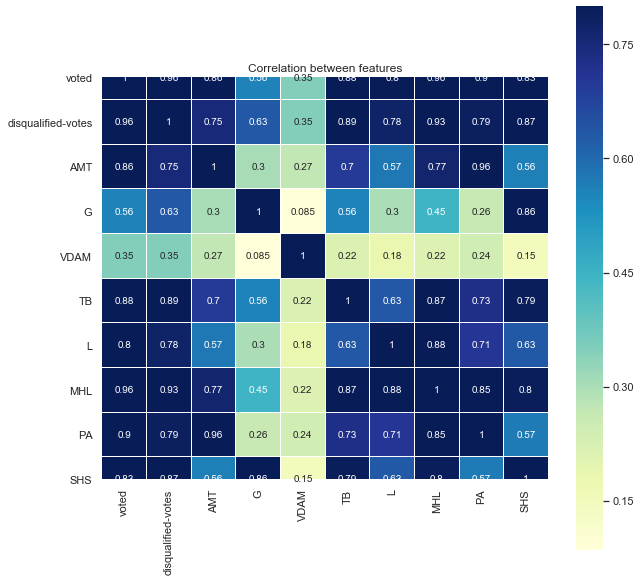

In [2]:
# section 2 of assignment, correlation matrix and scatter matrix of the 3 elections
data_21 = pd.read_csv('resultsKneset21.csv')
data_22 = pd.read_csv('resultsKneset22.csv')
data_23 = pd.read_csv('resultsKneset23.csv')

data_21 = data_21.drop(columns=['town-symbol'])
data_21 = data_21.drop(columns=['proper-votes'])
data_21 = data_21.drop(columns=['available-votes'])
data_21 = data_21.drop(columns=['OTHER'])

#correlation matrixes
corr = data_21.corr()
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True, annot=True, cmap='YlGnBu', linecolor="white")
plt.title('Correlation between features');

plt.show()

data_22 = data_22.drop(columns=['town-symbol'])
data_22 = data_22.drop(columns=['proper-votes'])
data_22 = data_22.drop(columns=['available-votes'])
data_22 = data_22.drop(columns=['OTHER'])
corr = data_22.corr()
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True, annot=True, cmap='YlGnBu', linecolor="white")
plt.title('Correlation between features');

plt.show()

data_23 = data_23.drop(columns=['town-symbol'])
data_23 = data_23.drop(columns=['proper-votes'])
data_23 = data_23.drop(columns=['available-votes'])
data_23 = data_23.drop(columns=['OTHER'])
corr = data_23.corr()
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True, annot=True, cmap='YlGnBu', linecolor="white")
plt.title('Correlation between features');

plt.show()


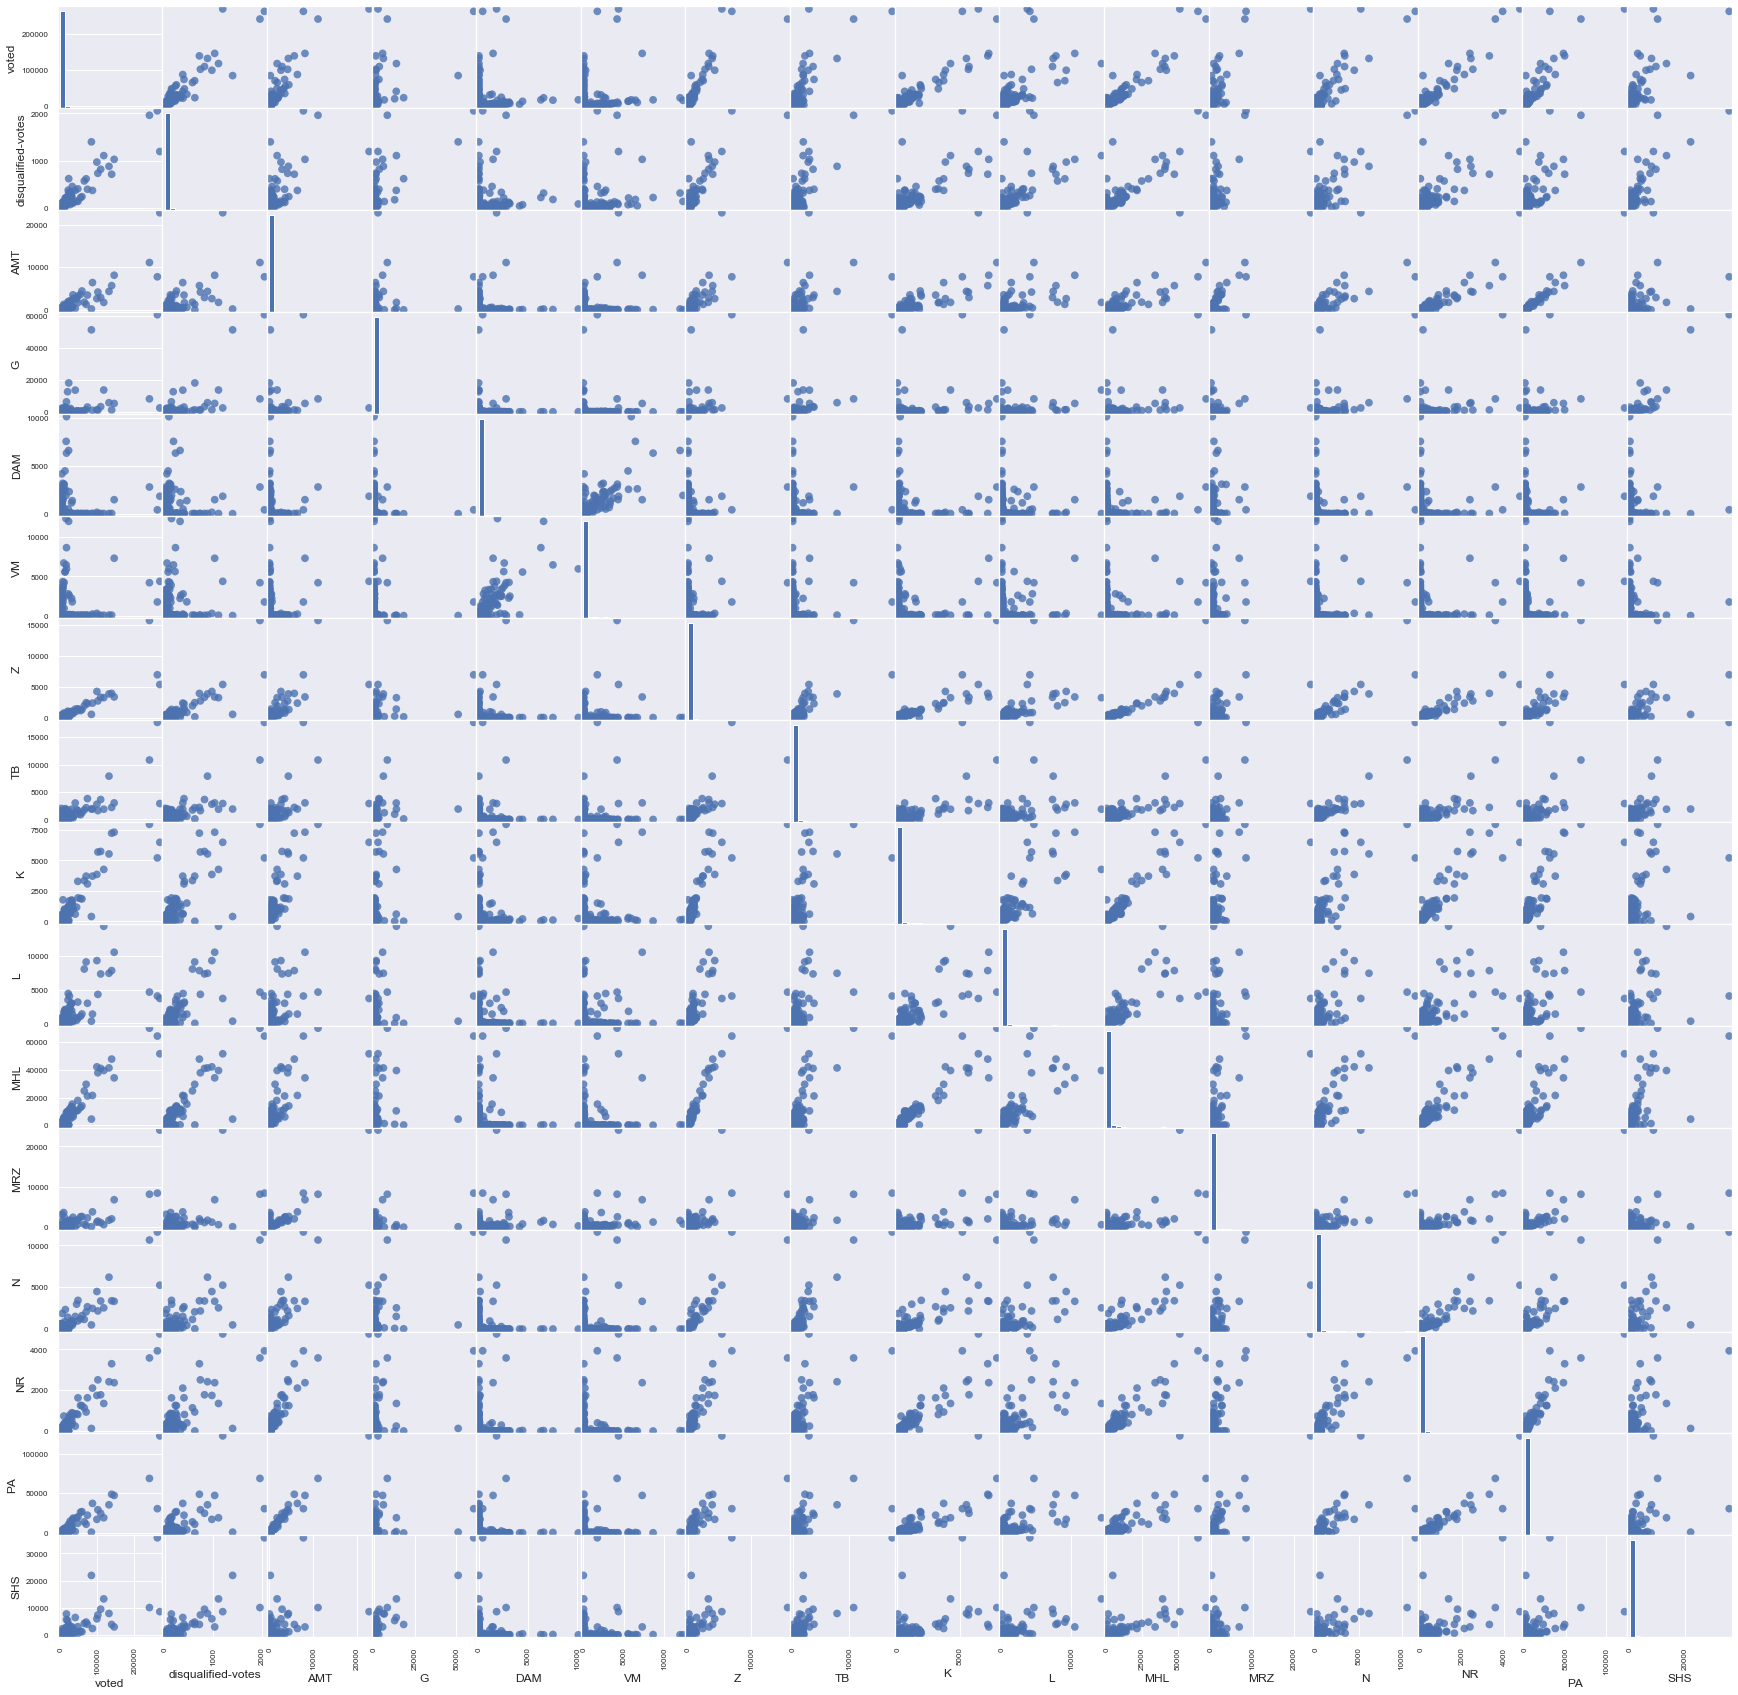

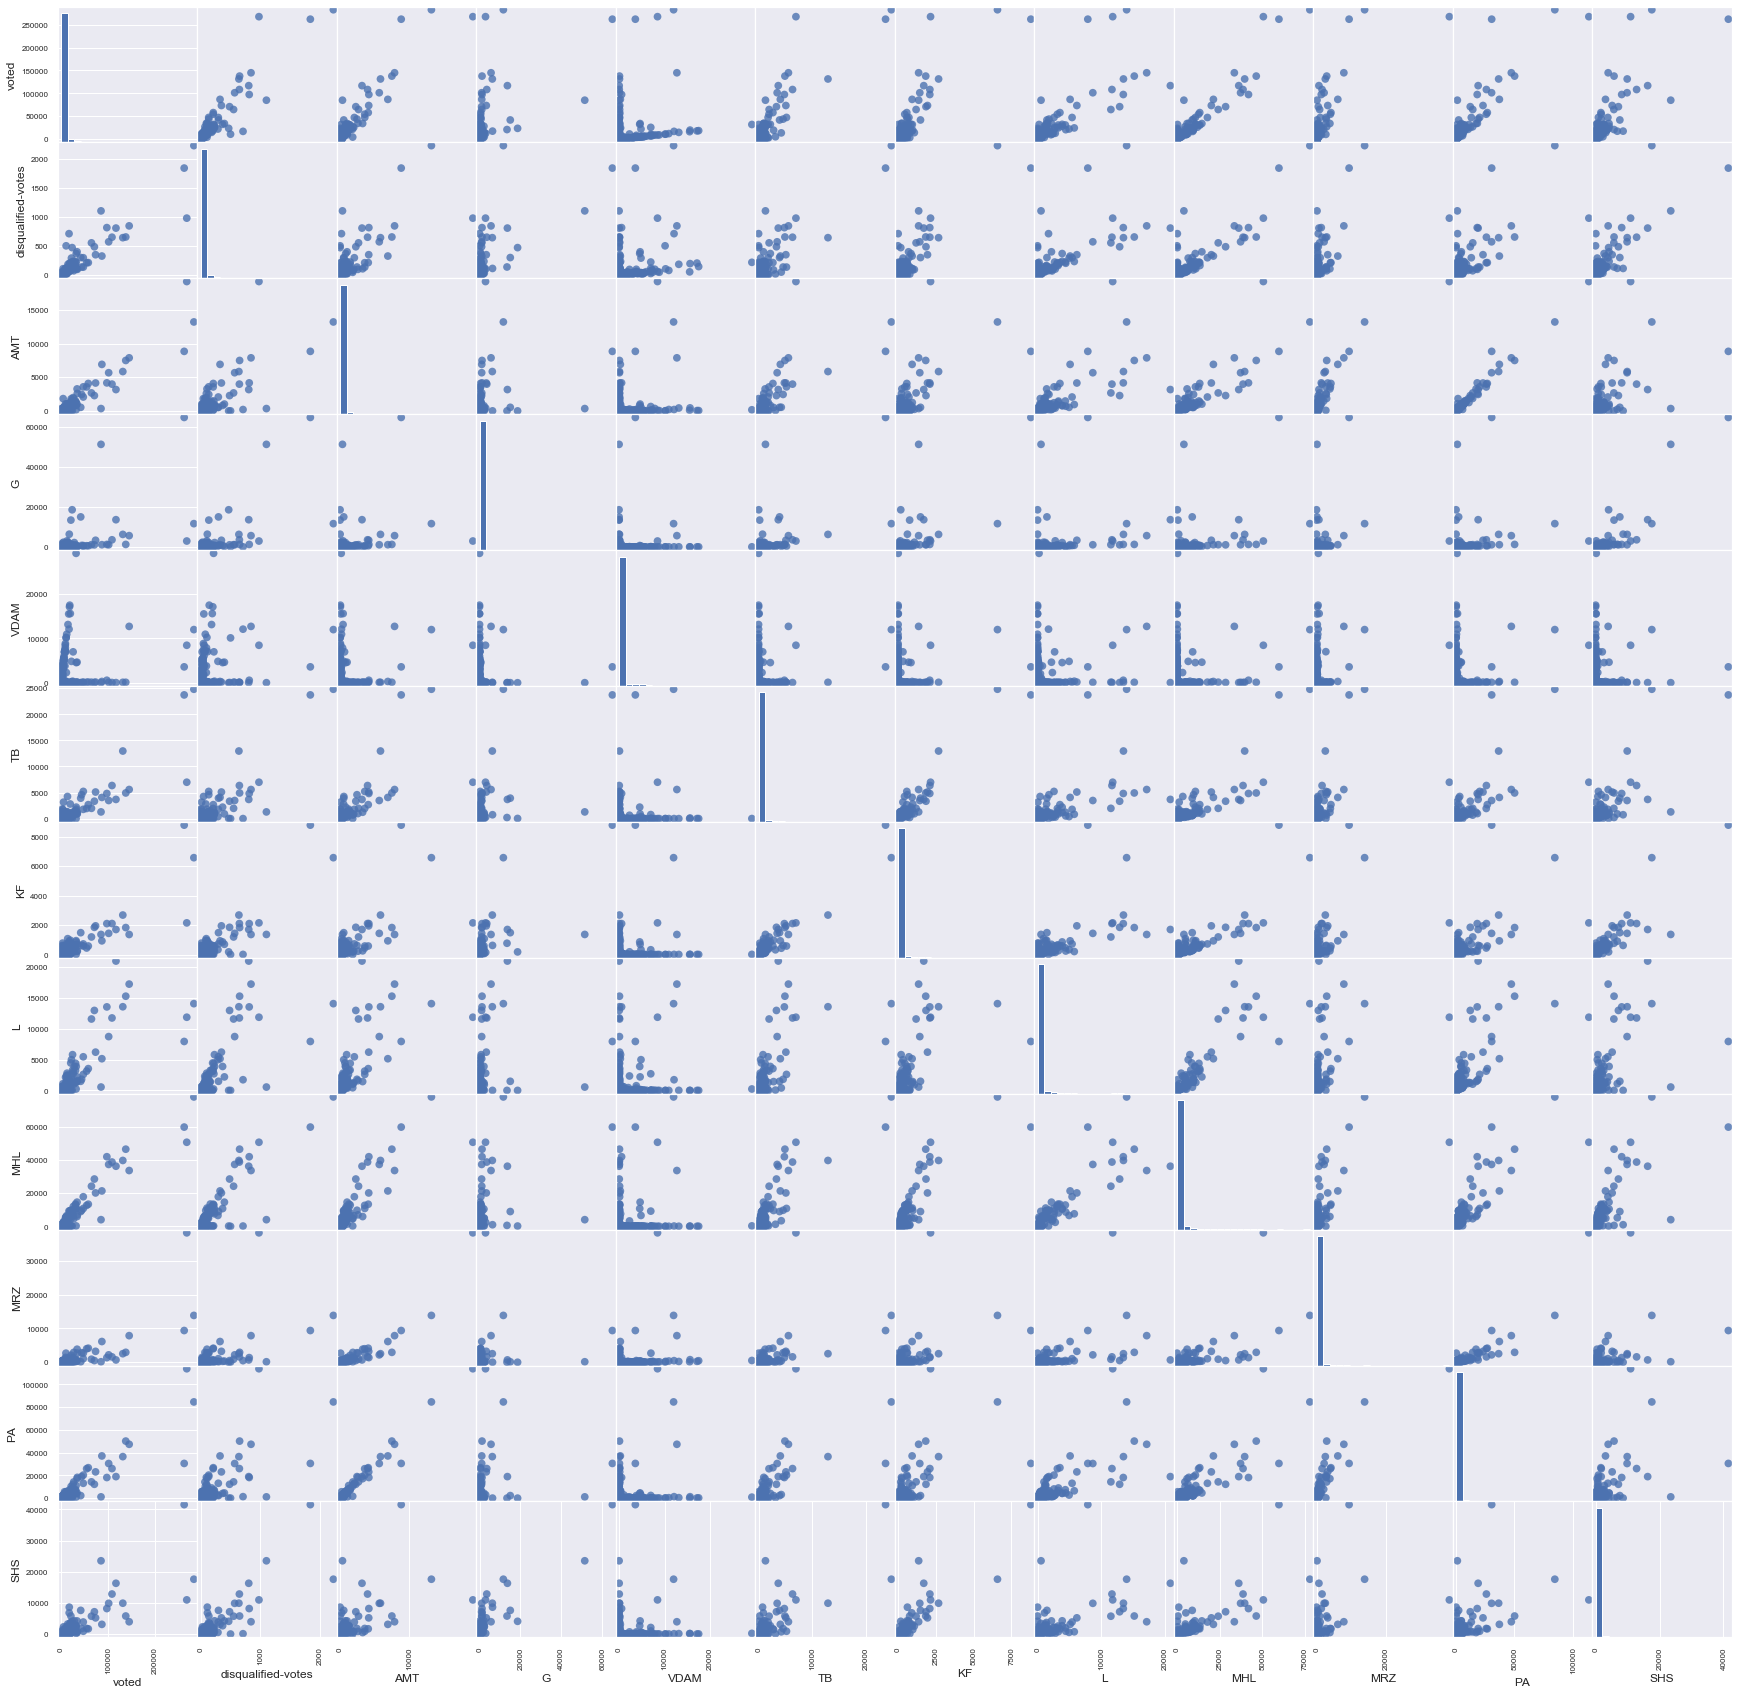

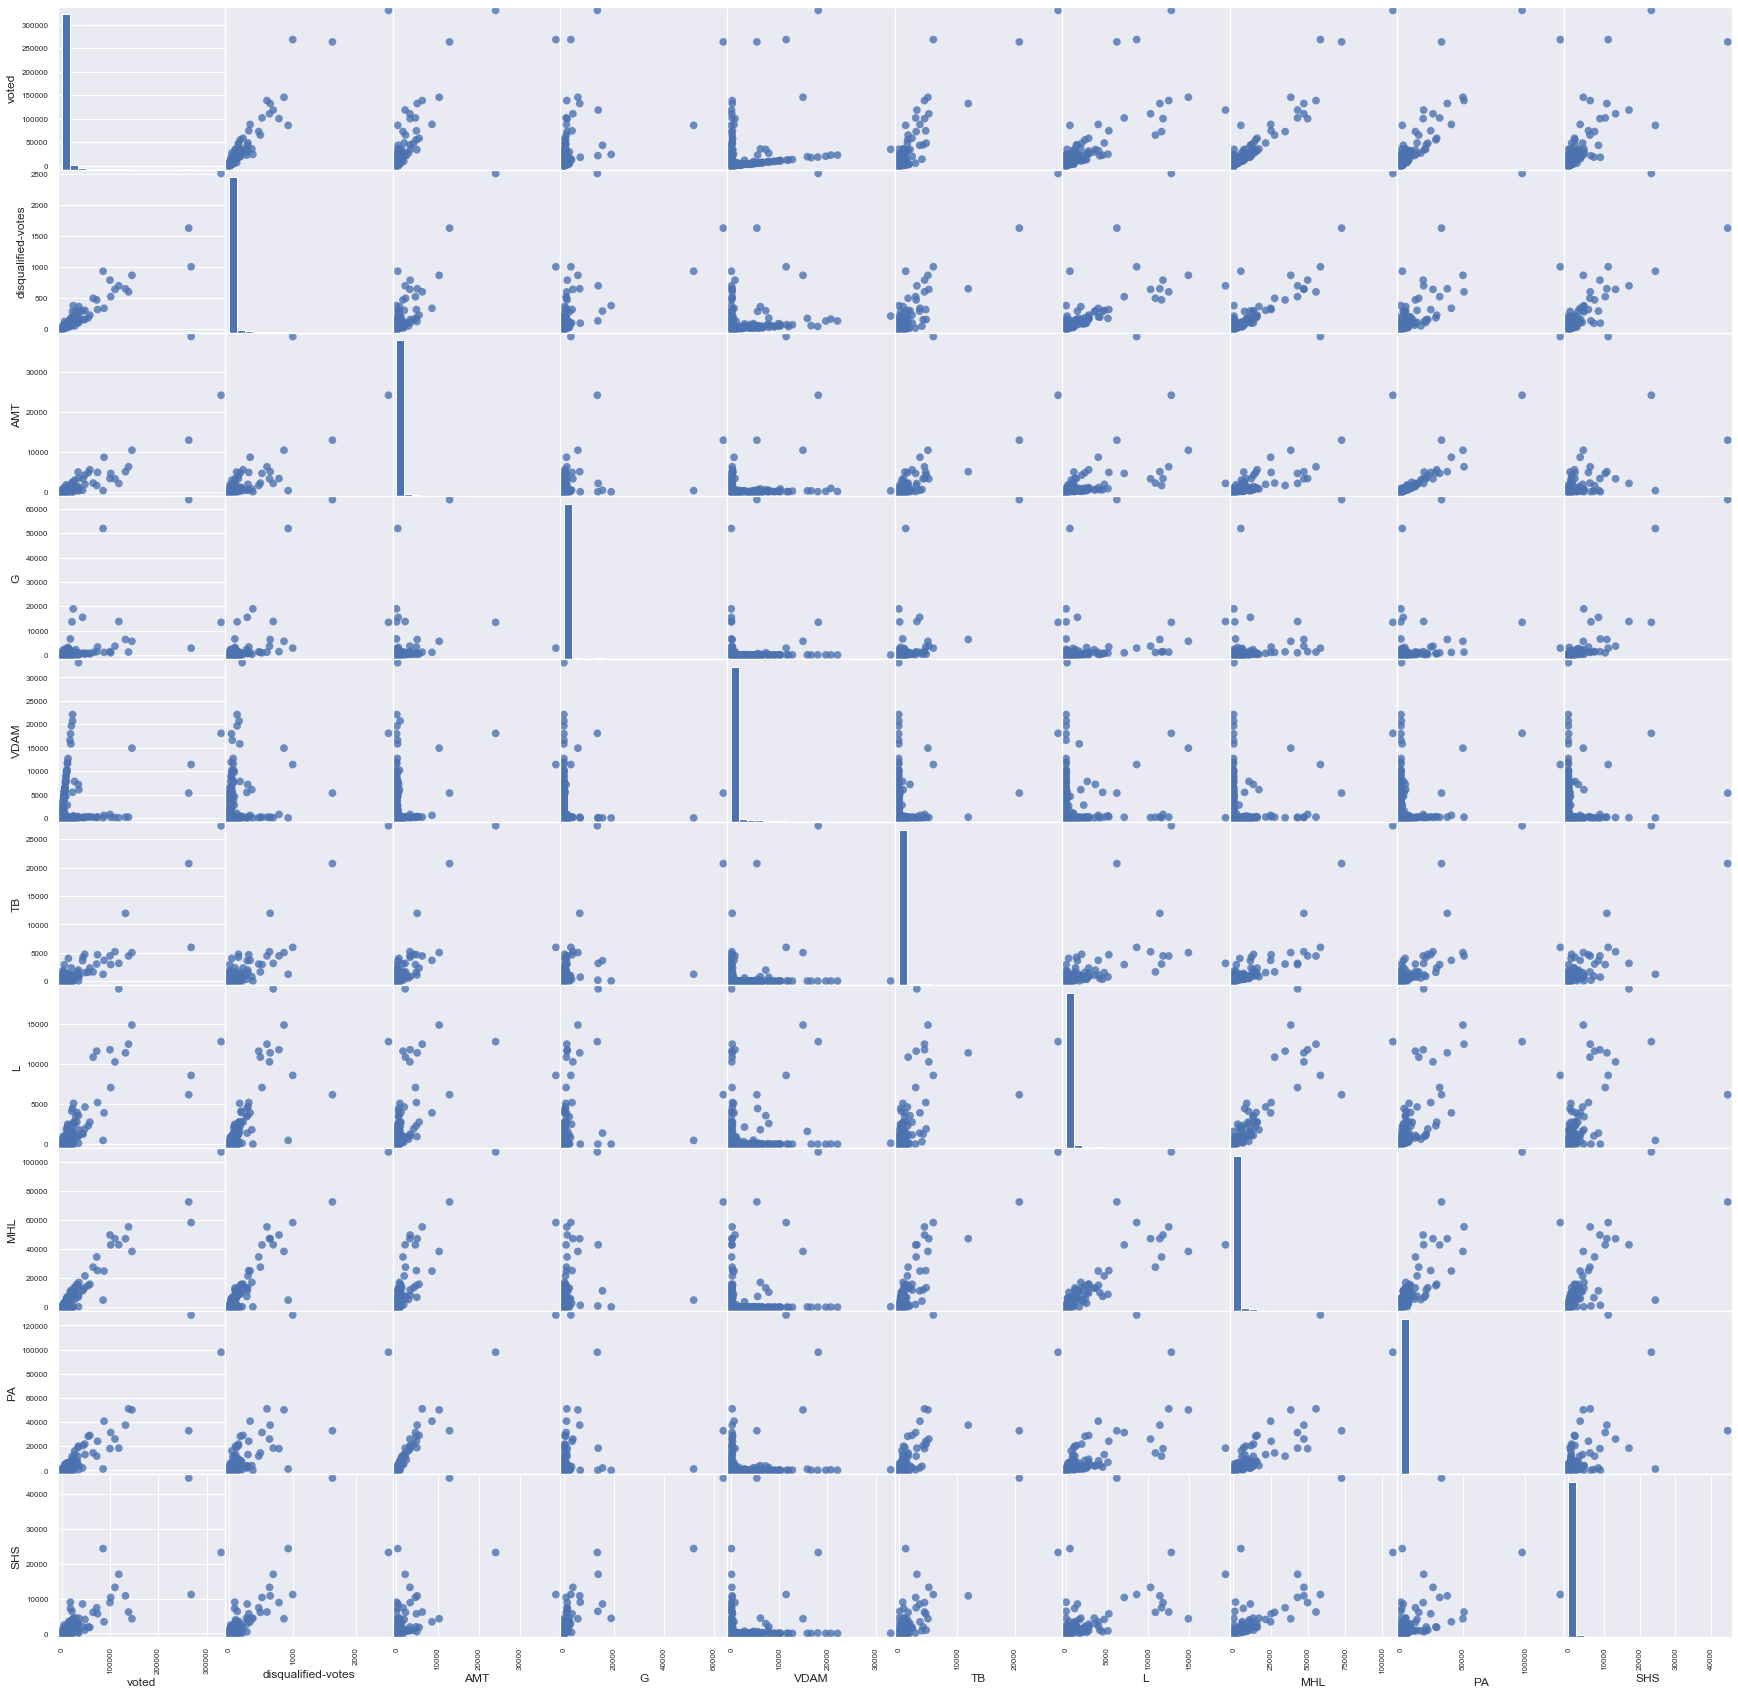

In [3]:
#scatter matrixes
pd.plotting.scatter_matrix(data_21, figsize=(30, 30),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8)
plt.show()

pd.plotting.scatter_matrix(data_22, figsize=(30, 30),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8)
plt.show()

pd.plotting.scatter_matrix(data_23, figsize=(30, 30),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8)
plt.show()

In [4]:
# section 3, GMM algorithm - features: voting percentage for each party that had more than 1% of the total votes
path = "ElectionPatternParties.xlsx"
df = pd.read_excel(path)
df = df.drop(columns=['town-symbol'])
gmm = GaussianMixture(n_components=6).fit(df)
scores = gmm.predict(df)
probs = gmm.predict_proba(df)
results_df = pd.read_excel('townsSymbols.xlsx')
results_df['Cluster'] = scores
results_df.to_excel('clusteringScoresGMM.xlsx') # creating excel files with the divisions
print("Finished GMM")

Finished GMM


In [5]:
# section 3, K means algorithm - features: voting percentage for each party that had more than 1% of the total votes
kmeans = KMeans(6, random_state=0)
scores = kmeans.fit(df).predict(df)
centroids = kmeans.cluster_centers_
#print(centroids)
inertia = kmeans.inertia_
print("inertia is "+str(inertia))
results_df = pd.read_excel('townsSymbols.xlsx')
results_df['Cluster'] = scores
results_df.to_excel('clusteringScoresKmeans.xlsx') # creating excel files with the divisions
print("Finished K means")

inertia is 32.08060189022216
Finished K means


In [6]:
# section 3, Hierarchical Agglomerative algorithm - features: voting percentage for each party that had more than 1% of the total votes
hc = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='complete')
scores = hc.fit_predict(df)
results_df = pd.read_excel('townsSymbols.xlsx')
results_df['Cluster'] = scores
results_df.to_excel('clusteringScoresHierarchy.xlsx') # creating excel files with the divisions
print("Finished Hierarchical Agglomerative")

Finished Hierarchical Agglomerative


In [7]:
# section 3, mean shift algorithm - features: voting percentage for each party that had more than 1% of the total votes
from scipy.spatial import distance
ms = MeanShift()
ms.fit(df)
cluster_centers = ms.cluster_centers_
# print(cluster_centers)

clustering = MeanShift(bandwidth=0.34).fit(df)
labels = ms.labels_
centers = ms.cluster_centers_

plt.show()

vectors = df.values.tolist()

sum = 0
i = 0
for vector in vectors:
    sum += distance.euclidean(vector, centers[labels[i]])**2
    i += 1

print("inertia is: "+str(sum)) # similar to inertia of k means
results_df = pd.read_excel('townsSymbols.xlsx')
results_df['Cluster'] = clustering.labels_
results_df.to_excel('clusteringScoresMeanshift.xlsx') # creating excel files with the divisions

print("Finished Mean Shift")

inertia is: 124.24972859722325
Finished Mean Shift


In [8]:
# regression forest for section 4 and 6 
def regression_forest(path, path_test, pred):
    data = pd.read_excel(path)
    test = pd.read_excel(path, path_test)
    y = data[pred]

    data = data.drop(columns=['town-symbol'])
    X = data.drop(columns=[pred])
    test = test.drop(columns=['town-symbol'])
    x_test = test.drop(columns=[pred])
    features = list(X.columns)

    param_grid = {
        'n_estimators': [200 ,400 ,600, 800, 1000],
        'max_depth': [10, 20, 30, 50, 70],
        'max_features': ['sqrt', X.shape[1]],
        'min_samples_split': [2, 3, 4],
    }

    rfr = RandomForestRegressor(random_state=1)

    best_forest = RandomizedSearchCV(rfr, param_grid, n_jobs=-1, cv=5,
                            n_iter=1, verbose=1, random_state=1)

    best_forest.fit(X, y)

    best_forest.best_params_

    model =  RandomForestRegressor(n_estimators=best_forest.best_params_['n_estimators'],
                               random_state=1,
                               max_features = best_forest.best_params_['max_features'],
                                   max_depth=best_forest.best_params_['max_depth'],
                                min_samples_split = best_forest.best_params_['min_samples_split'],
                               n_jobs=-1, verbose = 1)

    model.fit(X, y)

    predicts = model.predict(x_test)

    fi_model = pd.DataFrame({'feature': features,
                             'importance': model.feature_importances_}). \
        sort_values('importance', ascending=False)
    fi_model.head(10)

    print(fi_model)

    return predicts

In [15]:
# predict valid votes for section 4 - features: voting percentage by blocks(right, center-left, orthodox, arabs, liberman)
# total voting percentage, percentage of disqualified votes, city size
path = "predictKosherVotes.xlsx"
path_test = 'test-kosher'
pred = 'p-disqualified-votes'

predicts = regression_forest(path, path_test, pred)

predicts = 1 - predicts

results = pd.read_excel(path, 'test-kosher-discription')

noremlized_predicts = predicts * results['eligble-votes']

mse = metrics.mean_squared_error(noremlized_predicts, results['kosher-votes'])
print("mse is: "+str(mse))

print(['haifa', 'ayelet ha shachar', 'sakhnin', 'eilat','katzerin'])
print(list(noremlized_predicts))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.9s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:    0.0s finished


               feature  importance
0        p-total-voted    0.243070
1         p-votes-VDAM    0.160725
4        p-votes-right    0.142413
6            city-size    0.133871
2  p-votes-left-center    0.123009
3     p-votes-orthodox    0.100213
5     p-votes-liberman    0.096699
mse is: 50147.99326939458
['haifa', 'ayelet ha shachar', 'sakhnin', 'eilat', 'katzerin']
[144134.56736924688, 585.0474299775722, 17015.365545539305, 22562.947673731764, 3492.5046229693526]


In [17]:
# predicting votes for parties in section 5 - features: voting percentage for each party with more than 1% of the votes,
# city size, percentage of total votes, religion
path = "predictVotes.xlsx"
path_test = 'test'
preds = ['p-votes-MHL', 'p-votes-PA', 'p-votes-VDAM'] # we want to predict the percentage of votes of the parties
parties = ['MHL','PA','VDAM']

data = pd.read_excel(path)
test = pd.read_excel(path, path_test)
data = data.drop(columns=['town-symbol'])
test = test.drop(columns=['town-symbol'])
data = data.drop(columns=['city-size'])
test = test.drop(columns=['city-size'])
data = data.drop(columns=['p-votes-SHS'])
test = test.drop(columns=['p-votes-SHS'])
data = data.drop(columns=['p-votes-G'])
test = test.drop(columns=['p-votes-G'])
data = data.drop(columns=['p-votes-AMT'])
test = test.drop(columns=['p-votes-AMT'])
data = data.drop(columns=['p-votes-TB'])
test = test.drop(columns=['p-votes-TB'])
data = data.drop(columns=['p-votes-L'])
test = test.drop(columns=['p-votes-L'])
data = data.drop(columns=['p-total-voted'])
test = test.drop(columns=['p-total-voted'])

predicts = []
results = pd.read_excel(path, 'test-discription')
j = 3
for i in range(len(preds)):
    y = data[preds[i]]
    X = data
    x_test = test
    features = list(X.columns)

    adb = AdaBoostRegressor()
    adb_param_grid = {'n_estimators': [50, 100, 150, 200, 250],  # Number of weak learners to train iteratively.,
                      'learning_rate': [0.001, 0.01, 0.1, 1],
                      # It contributes to the weights of weak learners. It uses 1 as a default value.,
                      'random_state': [1]}

    gsADB = GridSearchCV(adb, param_grid=adb_param_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
    gsADB.fit(X, y)
    ADB_best = gsADB.best_estimator_
    adb = AdaBoostRegressor(ADB_best)
    adb.fit(X, y)

    fi_model = pd.DataFrame({'feature': features,
                             'importance': adb.feature_importances_}). \
        sort_values('importance', ascending=False)
    fi_model.head(10)

    print("feature importance of "+str(preds[i]))
    print(fi_model)

    predicts.append(adb.predict(x_test))

    mse = metrics.mean_squared_error(results[parties[i]], predicts[i])
    print("mse is: " + str(mse))
    j += 1

noremlized_predicts = []

for i in range(len(preds)):
    noremlized_predicts.append(predicts[i]*results['voted'])
    print("predictions of "+str(preds[i]))
    print(['jerusalem', 'bnei brack', 'sakhnin', 'karmiel', 'daliet el karmel'])
    print(list(noremlized_predicts[i]))

feature importance of p-votes-MHL
        feature  importance
1   p-votes-MHL         1.0
0  p-votes-VDAM         0.0
2    p-votes-PA         0.0
3      religion         0.0
mse is: 1074875010.9385319
feature importance of p-votes-PA
        feature  importance
2    p-votes-PA         1.0
0  p-votes-VDAM         0.0
1   p-votes-MHL         0.0
3      religion         0.0
mse is: 229615145.12469548
feature importance of p-votes-VDAM
        feature  importance
0  p-votes-VDAM         1.0
1   p-votes-MHL         0.0
2    p-votes-PA         0.0
3      religion         0.0
mse is: 60962999.522348985
predictions of p-votes-MHL
['jerusalem', 'bnei brack', 'sakhnin', 'karmiel', 'daliet el karmel']
[71241.47059571448, 3537.337381420864, 357.56520620958696, 9139.699919626088, 294.86403121141564]
predictions of p-votes-PA
['jerusalem', 'bnei brack', 'sakhnin', 'karmiel', 'daliet el karmel']
[33366.08529870335, 1897.1961441391795, 379.01898135784296, 6736.326565732926, 5144.640474741247]
predicti

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:    0.1s finished


               feature  importance
0        p-total-voted    0.243070
1         p-votes-VDAM    0.160725
4        p-votes-right    0.142413
6            city-size    0.133871
2  p-votes-left-center    0.123009
3     p-votes-orthodox    0.100213
5     p-votes-liberman    0.096699


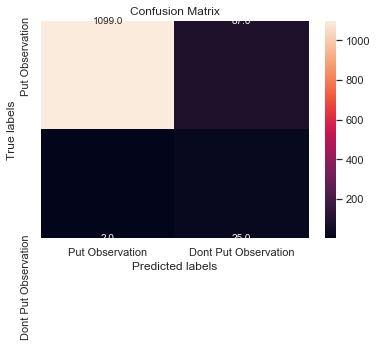

In [13]:
# predict disqualified votes for section 6 with confusion matrix - features: voting percentage by blocks
#(right, center-left, orthodox, arabs, liberman) ,total voting percentage, percentage of disqualified votes, city size
path = "predictKosherVotes.xlsx"
path_test = 'test-disqualified'
pred = 'p-disqualified-votes'

# we will check a condition that will divide a prediction to put observation or do not put observation (boolean)
predicts = regression_forest(path, path_test,pred)
discriptions = pd.read_excel(path, 'test-disqualified-discription')
test = pd.read_excel(path, 'test-disqualified')
boolean_predictions = []
for i in range(len(predicts)):
    #checking if the number of disqualified votes is at least 20 and the disqualified percentage above 0.008 (predictions)
    if predicts[i]*test['city-size'][i] >= 20 and predicts[i] >= 0.008:
        boolean_predictions.append(True)
    else:
        boolean_predictions.append(False)

dis = discriptions['disqualified-votes']
eli_votes = discriptions['eligble-votes']

true_vals = dis/eli_votes
boolean_true = []
for i in range(len(true_vals)):
    #checking if the number of disqualified votes is at least 20 and the disqualified percentage above 0.008 (true values)
    if true_vals[i]*eli_votes[i] >= 20 and true_vals[i] >= 0.008:
        boolean_true.append(True)
    else:
        boolean_true.append(False)

cm = confusion_matrix(boolean_true, boolean_predictions) #creating confusion matrix
# plotting with heatmap

ax = plt.subplot()


sn.heatmap(cm, annot=True, ax = ax, fmt = ".1f")

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Put Observation', 'Dont Put Observation'])
ax.yaxis.set_ticklabels(['Put Observation', 'Dont Put Observation'])


plt.show()